# Data & Library Load


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.ticker as ticker

from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.model_selection  import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import *
import statsmodels.formula.api as smf
import random
from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score, f1_score
from sklearn import metrics
from sklearn.metrics import *

from matplotlib.pyplot import show
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
import imblearn

from sklearn.linear_model import LogisticRegression
import random
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics, datasets, tree
%matplotlib inline
from sklearn.metrics import mean_squared_error
import math
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_regression



In [2]:
df = pd.read_csv("hotel_bookings.csv", low_memory = False)

In [3]:
df.shape

(119390, 32)

In [4]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


## Descriptive Statistics 

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Base Exploratory Data Analysis

In [7]:
# Function for countplot
def cnt(xname, df):
    sns.countplot(x=xname, data = df)

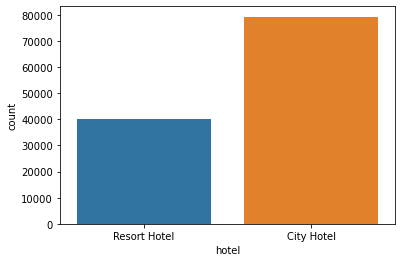

In [8]:
cnt('hotel', df)

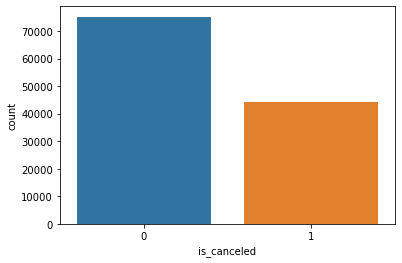

In [9]:
cnt('is_canceled' , df)

<AxesSubplot:xlabel='lead_time'>

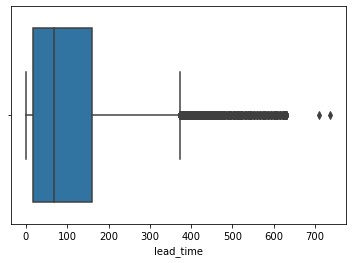

In [10]:
sns.boxplot(x = 'lead_time' ,data= df)

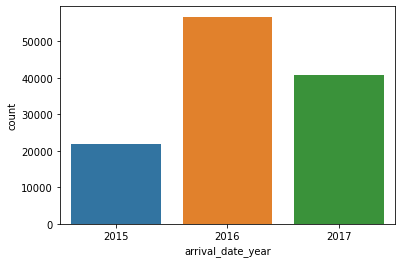

In [11]:
cnt('arrival_date_year' , df)

<AxesSubplot:xlabel='arrival_date_week_number'>

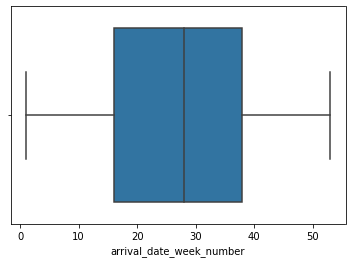

In [12]:
sns.boxplot(x='arrival_date_week_number' ,data= df)

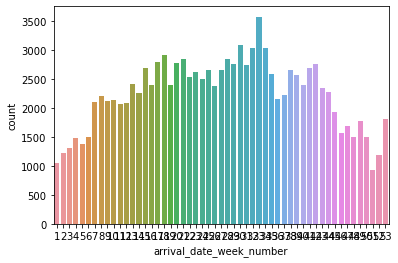

In [13]:
cnt('arrival_date_week_number' , df)

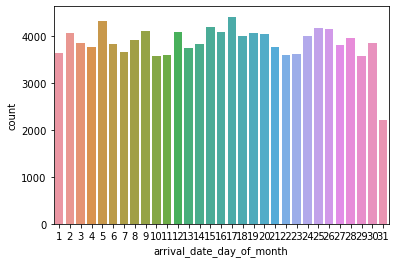

In [14]:
cnt('arrival_date_day_of_month' , df)

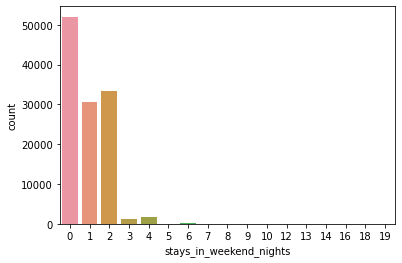

In [15]:
cnt('stays_in_weekend_nights' , df)

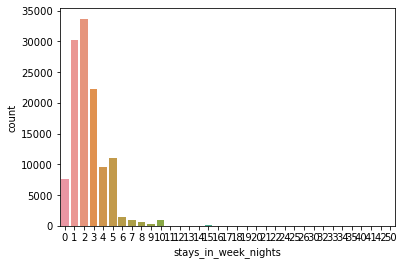

In [16]:
cnt('stays_in_week_nights' , df)

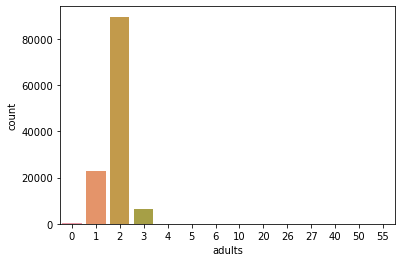

In [17]:
cnt('adults' , df)

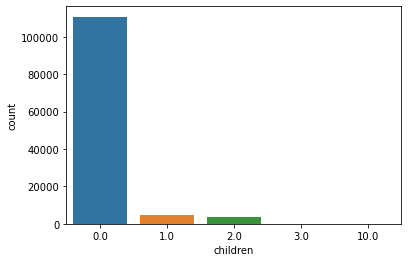

In [18]:
cnt('children' , df)

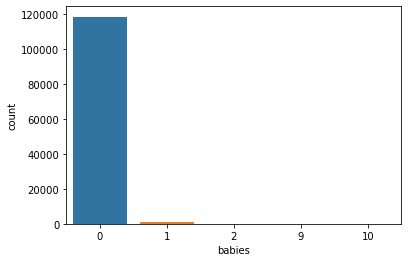

In [19]:
cnt('babies' , df)

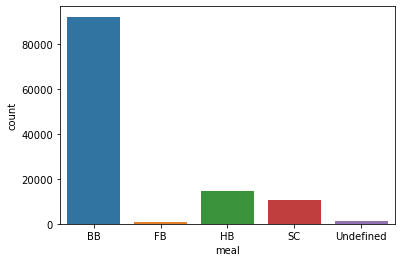

In [20]:
cnt('meal' , df)

In [21]:
# cnt('country' , df)

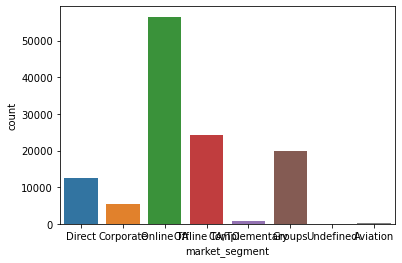

In [22]:
cnt('market_segment' , df)

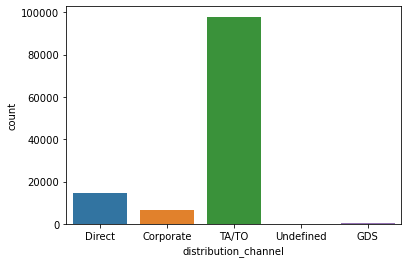

In [23]:
cnt('distribution_channel' , df)

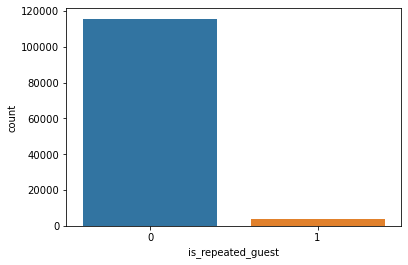

In [24]:
cnt('is_repeated_guest' , df)

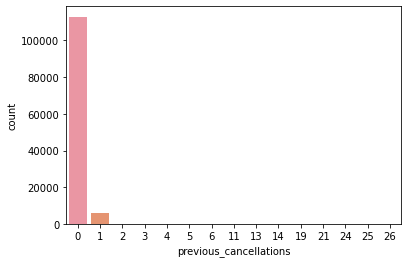

In [25]:
cnt('previous_cancellations' , df)

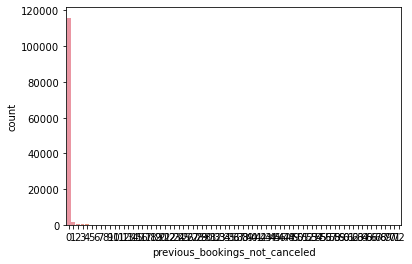

In [26]:
cnt('previous_bookings_not_canceled' , df)

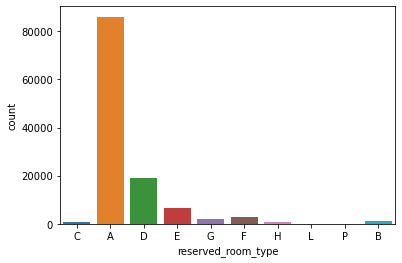

In [27]:
cnt('reserved_room_type' , df)

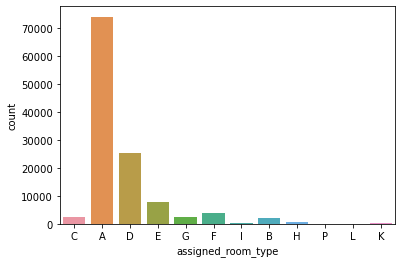

In [28]:
cnt('assigned_room_type' , df)

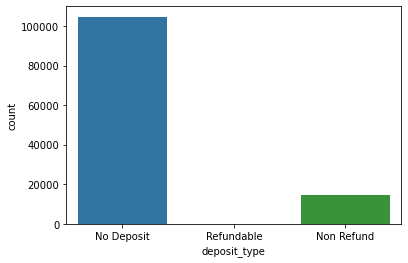

In [29]:
cnt('deposit_type' , df)

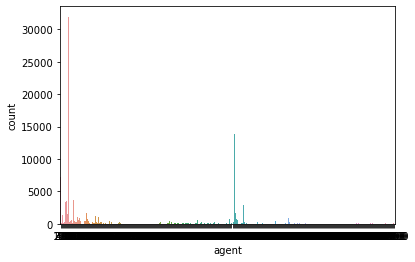

In [30]:
cnt('agent' , df)

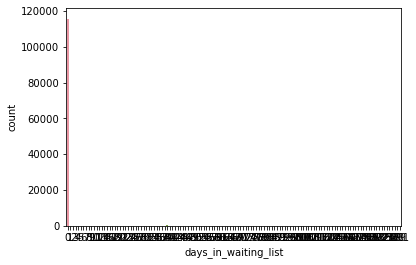

In [31]:
cnt('days_in_waiting_list' , df)

<AxesSubplot:xlabel='days_in_waiting_list'>

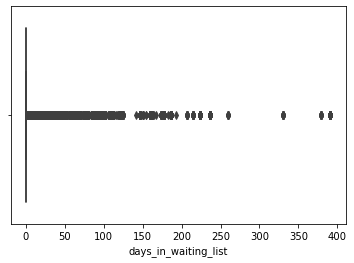

In [32]:
sns.boxplot(x='days_in_waiting_list' ,data= df)

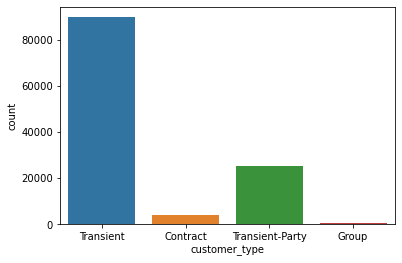

In [33]:
cnt('customer_type' , df)

<AxesSubplot:xlabel='adr'>

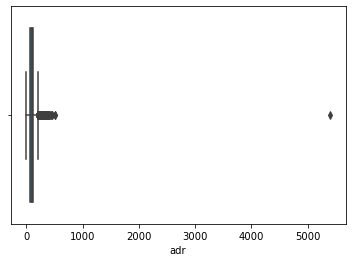

In [34]:
sns.boxplot(x='adr' ,data= df)

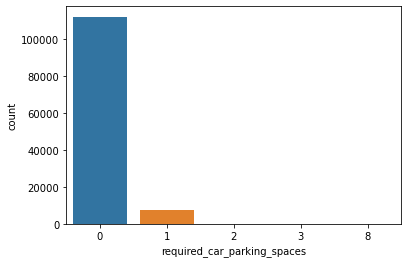

In [35]:
cnt('required_car_parking_spaces' , df)

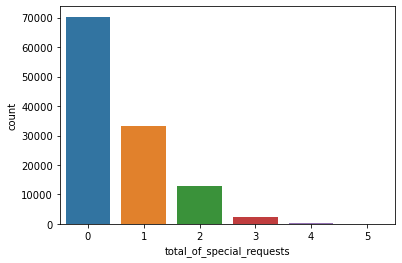

In [36]:
cnt('total_of_special_requests' , df)

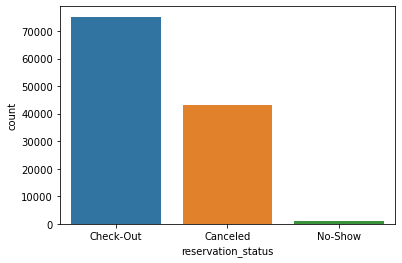

In [37]:
cnt('reservation_status' , df)

In [38]:
# cnt('reservation_status_date' , df)

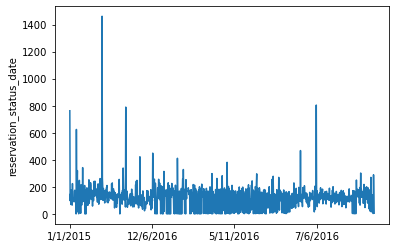

In [39]:
ax = sns.lineplot(x = df['reservation_status_date'].value_counts().index, y = df['reservation_status_date'].value_counts(), data =df)
tick_locator = ticker.MaxNLocator(5)
ax.xaxis.set_major_locator(tick_locator)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Deal with Null values

In [41]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [42]:
# Drop company col
df1 = df.drop(["company"], axis = 1)

In [43]:
# drop all na
df1 = df1.dropna(axis =0)

## Boxplot analysis and deal with outliers (IQR method)

In [44]:
df1.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [45]:
# This function takes a pandas Series and returns a tuple of
# upper and lower boundary using the boxplot.

def whiskers (c):
    c_desc = c.describe()
    q1 = c_desc['25%']
    q3 = c_desc['75%']
    iqr = q3 - q1 #interquartile range
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    return{'upper': upper,'lower': lower}


In [46]:
# This function takes a DataFrame and returns a DataFrame containing
# the number of outliers above and below the upper and lower boundary, respectively
# for each column.

def num_outliers(df):
    cols = ['ColName','Upper outliers','Lower outliers','Outlier Ratio']
    outlier_table = pd.DataFrame(columns=cols)
        
    for c in df.columns:
        s = df[c]
        n_upper = s[s>whiskers(s)['upper']].count()
        n_lower = s[s < whiskers(s)['lower']].count()
        ratio = (n_upper + n_lower)/len(df[c])
        outlier_row = pd.DataFrame([[c,n_upper,n_lower,ratio]],columns=cols)
        outlier_table = pd.concat([outlier_table, outlier_row], axis=0,ignore_index=True)
    return outlier_table


In [47]:
# This takes a DataFrame and returns a DataFrame after removing the outliers.
def delete_outliers(df):
    for c in df.columns:
        s = df[c]
        if s[s>whiskers(s)['upper']].count() > 0:
            df = df.drop (df[df[c]> whiskers(s)['upper']].index)
        if s[s>whiskers(s)['lower']].count() > 0:
            df = df.drop (df[df[c] < whiskers(s)['lower']].index)
    return df


In [48]:
df_dummy = df1

In [49]:
df_dummy.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [50]:
df_dummy.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [51]:
# filter for numeric columns for boxplot analysis
df_num = df_dummy[['lead_time', 
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled','booking_changes',
       'days_in_waiting_list', 
       'required_car_parking_spaces', 'total_of_special_requests']]

In [52]:
df_num.dtypes

lead_time                           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
required_car_parking_spaces         int64
total_of_special_requests           int64
dtype: object

In [53]:
df_num.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000
mean,111.740092,0.978181,2.589655,1.899926,0.111231,0.007697,0.014034,0.077215,0.024365,0.201780,2.619579,0.053035,0.605458
std,107.681013,1.003991,1.905941,0.490891,0.411982,0.097089,0.117631,0.758185,0.435759,0.624954,18.797440,0.225359,0.799342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,79.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,169.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,629.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,391.000000,3.000000,5.000000


In [54]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

lead_time                         143.0
stays_in_weekend_nights             2.0
stays_in_week_nights                2.0
adults                              0.0
children                            0.0
babies                              0.0
is_repeated_guest                   0.0
previous_cancellations              0.0
previous_bookings_not_canceled      0.0
booking_changes                     0.0
days_in_waiting_list                0.0
required_car_parking_spaces         0.0
total_of_special_requests           1.0
dtype: float64


In [55]:
df_dummy["booking_changes"].unique()

array([ 0,  1,  2,  3,  5,  4, 17,  6,  8,  7, 10, 16,  9, 13, 12, 14, 15,
       18, 11], dtype=int64)

In [56]:
# Create separate data set for 'is_canceled' col: is_canceled & is_not_canceled for model creation
df_cancel = df_dummy.loc[df['is_canceled'] == 1]
df_no_cancel = df_dummy.loc[df['is_canceled'] == 0]

Text(0.5, 1.0, 'Lead Time')

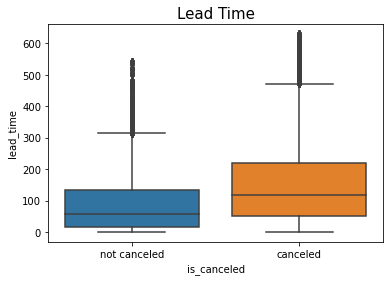

In [57]:
canceled = ['not canceled', 'canceled']
ax = sns.boxplot(y = df_dummy["lead_time"], x = df_dummy['is_canceled'])
ax.set_xticklabels(canceled)
plt.title('Lead Time', fontsize = 15)


<AxesSubplot:xlabel='is_canceled', ylabel='arrival_date_week_number'>

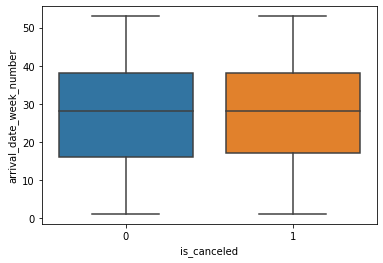

In [58]:
sns.boxplot(y = df_dummy["arrival_date_week_number"], x = df_dummy['is_canceled'])

<AxesSubplot:xlabel='is_canceled', ylabel='stays_in_weekend_nights'>

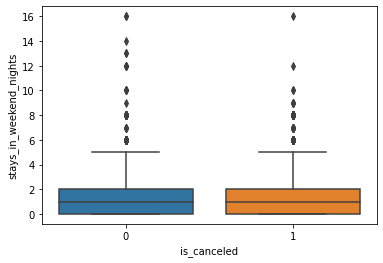

In [59]:
sns.boxplot(y = df_dummy["stays_in_weekend_nights"], x = df_dummy['is_canceled'])

<AxesSubplot:xlabel='is_canceled', ylabel='stays_in_week_nights'>

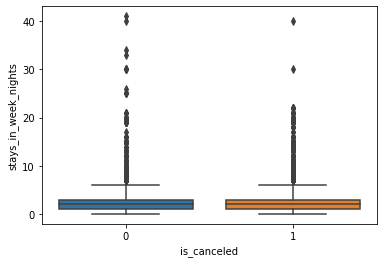

In [60]:
sns.boxplot(y = df_dummy["stays_in_week_nights"], x = df_dummy['is_canceled'])

<AxesSubplot:xlabel='is_canceled', ylabel='adults'>

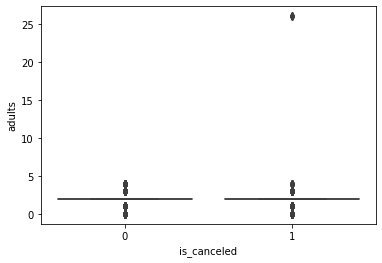

In [61]:
sns.boxplot(y = df_dummy["adults"], x = df_dummy['is_canceled'])

<AxesSubplot:xlabel='is_canceled', ylabel='children'>

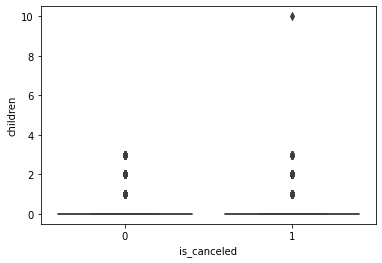

In [62]:
sns.boxplot(y = df_dummy["children"], x = df_dummy['is_canceled'])

<AxesSubplot:xlabel='is_canceled', ylabel='babies'>

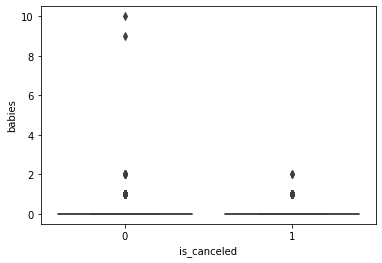

In [63]:
sns.boxplot(y = df_dummy["babies"], x = df_dummy['is_canceled'])

<AxesSubplot:xlabel='is_canceled', ylabel='is_repeated_guest'>

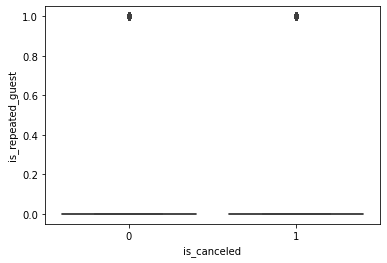

In [64]:
sns.boxplot(y = df_dummy["is_repeated_guest"], x = df_dummy['is_canceled'])

<AxesSubplot:xlabel='is_canceled', ylabel='previous_cancellations'>

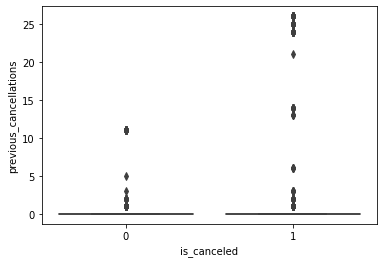

In [65]:
sns.boxplot(y = df_dummy["previous_cancellations"], x = df_dummy['is_canceled'])

<AxesSubplot:xlabel='is_canceled', ylabel='previous_bookings_not_canceled'>

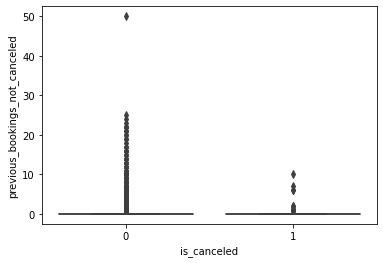

In [66]:
sns.boxplot(y = df_dummy["previous_bookings_not_canceled"], x = df_dummy['is_canceled'])

<AxesSubplot:xlabel='is_canceled', ylabel='adr'>

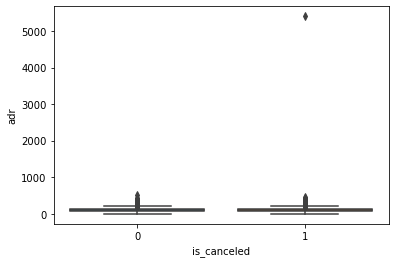

In [67]:
sns.boxplot(y = df_dummy["adr"], x = df_dummy['is_canceled'])

<AxesSubplot:xlabel='is_canceled', ylabel='booking_changes'>

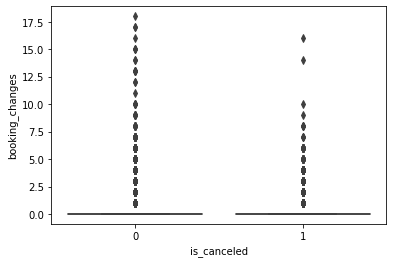

In [68]:
sns.boxplot(y = df_dummy["booking_changes"], x = df_dummy['is_canceled'])

<AxesSubplot:xlabel='is_canceled', ylabel='required_car_parking_spaces'>

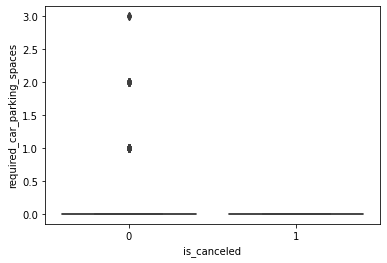

In [69]:
sns.boxplot(y = df_dummy["required_car_parking_spaces"], x = df_dummy['is_canceled'])


<AxesSubplot:xlabel='is_canceled', ylabel='total_of_special_requests'>

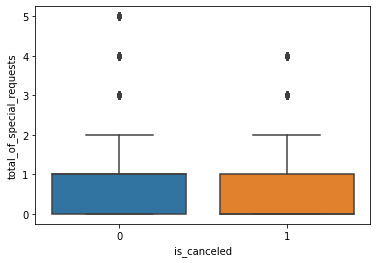

In [70]:
sns.boxplot(y = df_dummy["total_of_special_requests"], x = df_dummy['is_canceled'])

In [71]:
# Check Distributions of selected features

In [72]:
df10 = df_dummy.groupby(['is_canceled'])['adr']
df10.describe()

,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,62733.0,103.748014,47.945907,-6.38,72.5,96.0,127.0,510.0
1,40161.0,106.135568,53.069915,0.00,74.0,97.2,129.0,5400.0


In [73]:
df_dummy.groupby(['is_canceled'])['total_of_special_requests'].describe()

,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,62733.0,0.770424,0.836157,0.0,0.0,1.0,1.0,5.0
1,40161.0,0.347775,0.660300,0.0,0.0,0.0,1.0,4.0


In [74]:
df_dummy.groupby(['is_canceled'])['required_car_parking_spaces'].describe()

,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,62733.0,0.086988,0.283455,0.0,0.0,0.0,0.0,3.0
1,40161.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [75]:
df_dummy.groupby(['is_canceled'])['booking_changes'].describe()


,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,62733.0,0.267642,0.703992,0.0,0.0,0.0,0.0,18.0
1,40161.0,0.098902,0.457321,0.0,0.0,0.0,0.0,16.0


In [76]:
df_dummy.groupby(['is_canceled'])['previous_cancellations'].describe()


,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,62733.0,0.005643,0.22451,0.0,0.0,0.0,0.0,11.0
1,40161.0,0.189014,1.17199,0.0,0.0,0.0,0.0,26.0


In [77]:
df_dummy['stays_in_weekend_nights'].value_counts()

0     42421
2     31120
1     26217
4      1712
3      1127
6       144
5        62
8        53
7        16
10        6
12        5
9         5
16        3
13        2
14        1
Name: stays_in_weekend_nights, dtype: int64

In [78]:
df_dummy['stays_in_week_nights'].value_counts()

2     30124
1     23790
3     19935
5     10353
4      8550
0      5725
6      1362
10      964
7       938
8       600
9       194
15       79
11       50
19       41
12       39
20       36
14       33
13       23
16       16
21       14
18        5
22        5
30        5
25        4
17        3
40        2
26        1
33        1
34        1
41        1
Name: stays_in_week_nights, dtype: int64

In [79]:
df_dummy['previous_bookings_not_canceled'].value_counts()

0     101909
1        605
2        145
3         59
4         43
5         38
6         22
7         12
9          9
10         9
8          8
12         4
22         4
11         3
13         3
14         3
16         3
15         2
17         2
19         2
20         2
21         2
25         1
18         1
23         1
24         1
50         1
Name: previous_bookings_not_canceled, dtype: int64

In [80]:
df_dummy['days_in_waiting_list'].value_counts()

0      99355
39       226
58       164
44       140
31       107
       ...  
92         1
81         1
52         1
116        1
89         1
Name: days_in_waiting_list, Length: 122, dtype: int64

In [81]:
df_dummy['children'].value_counts()

0.0     95001
1.0      4407
2.0      3427
3.0        58
10.0        1
Name: children, dtype: int64

In [82]:
df_dummy['required_car_parking_spaces'].value_counts()

0    97463
1     5408
2       20
3        3
Name: required_car_parking_spaces, dtype: int64

In [83]:
df_dummy['total_of_special_requests'].value_counts()

0    57956
1    30441
2    11964
3     2232
4      272
5       29
Name: total_of_special_requests, dtype: int64

In [84]:
df_dummy['babies'].value_counts()

0     102130
1        751
2         11
10         1
9          1
Name: babies, dtype: int64

In [85]:
# Remove outliers based on unique value counts n in each column from the based EDA
df_dummy = df_dummy[df_dummy['stays_in_weekend_nights']<=10]
df_dummy = df_dummy[df_dummy['stays_in_week_nights']<=20]
df_dummy = df_dummy[df_dummy['previous_bookings_not_canceled']<=10]
df_dummy = df_dummy[df_dummy['days_in_waiting_list']<=10]
df_dummy = df_dummy[df_dummy['children']<=5]
df_dummy = df_dummy[df_dummy['required_car_parking_spaces']<=5]
df_dummy = df_dummy[df_dummy['total_of_special_requests']<=5]
df_dummy = df_dummy[df_dummy['babies']<=8]
df_dummy = df_dummy[df_dummy['adr']<=1000]

In [86]:
whiskers(df_dummy["lead_time"])

{'upper': 372.5, 'lower': -183.5}

In [87]:
whiskers(df_dummy["adr"])

{'upper': 212.24999999999997, 'lower': -10.549999999999983}

In [88]:
Q1 = df_dummy["lead_time"].quantile(0.25)
Q3 = df_dummy["lead_time"].quantile(0.75)
IQR = Q3 - Q1

df_dummy_no_outlier = df_dummy.loc[(df_dummy['lead_time'] > Q1) & (df_dummy['lead_time'] < Q3)]


In [89]:
Q1 = df_dummy_no_outlier["adr"].quantile(0.25)
Q3 = df_dummy_no_outlier["adr"].quantile(0.75)
IQR = Q3 - Q1

df_dummy_no_outlier = df_dummy_no_outlier.loc[(df_dummy_no_outlier['adr'] > Q1) & (df_dummy_no_outlier['adr'] < Q3)]

In [90]:
df_dummy.shape

(99439, 31)

In [91]:
df_dummy_no_outlier.shape

(24510, 31)

#### Outlier removal using IQR for lead_time & adr will result losing too much information. As a consequence, I keep outliers in these two columns

## Correlation analysis

To investigate information hidden due to imbalance in the dataset, resampling method is applied before correlation test

In [92]:
df_dummy['is_canceled'].value_counts()

0    61472
1    37967
Name: is_canceled, dtype: int64

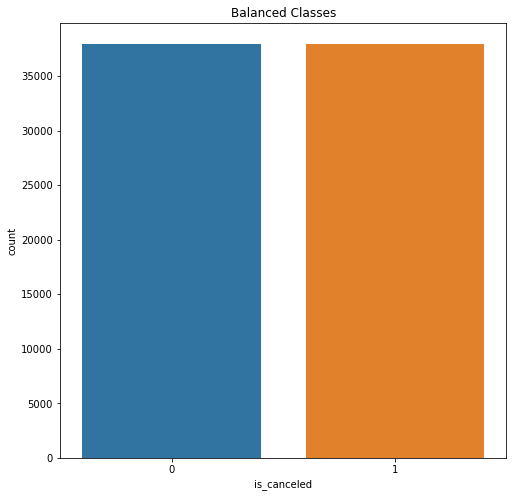

In [93]:
# Shuffle the Dataset.
shuffled_df = df_dummy.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
fraud_df = shuffled_df.loc[shuffled_df['is_canceled'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_fraud_df = shuffled_df.loc[shuffled_df['is_canceled'] == 0].sample(n=37968,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([fraud_df, non_fraud_df])
# df_dummy = normalized_df
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('is_canceled', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

#### Numerical features

In [94]:
corr = df.corr()["is_canceled"]

corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [95]:
corr = normalized_df.corr()["is_canceled"]

corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.270282
total_of_special_requests         0.261302
required_car_parking_spaces       0.214746
booking_changes                   0.137866
previous_cancellations            0.102375
agent                             0.076177
previous_bookings_not_canceled    0.059289
adults                            0.046547
babies                            0.036014
is_repeated_guest                 0.028653
days_in_waiting_list              0.025588
adr                               0.025222
arrival_date_week_number          0.019246
stays_in_weekend_nights           0.017874
stays_in_week_nights              0.009979
children                          0.008950
arrival_date_day_of_month         0.004052
arrival_date_year                 0.001626
Name: is_canceled, dtype: float64

#### Categorical features

##### Cramer's V

In [96]:
### Cramer's V

# Cramer's V function
def cramer_v(x, y):
    n = len(x)
    ct = pd.crosstab(x, y) # crosstab
    chi2 = chi2_contingency(ct)[0]
    v = np.sqrt(chi2 / (n * (np.min(ct.shape) - 1)))
    return v

##### Original Data

In [97]:
cramer_v(df['hotel'], df['is_canceled'])

0.13651290309212544

In [98]:
cramer_v(df['meal'], df['is_canceled'])

0.05048024467506253

In [99]:
cramer_v(df['market_segment'], df['is_canceled'])

0.26678079336123384

In [100]:
cramer_v(df['distribution_channel'], df['is_canceled'])

0.17712830873840107

In [101]:
cramer_v(df['reserved_room_type'], df['is_canceled'])

0.0736628063572444

In [102]:
cramer_v(df['assigned_room_type'], df['is_canceled'])

0.2029742285211196

In [103]:
cramer_v(df['deposit_type'], df['is_canceled'])

0.48147984706556696

In [104]:
cramer_v(df['customer_type'], df['is_canceled'])

0.1364386190905123

##### Normalized Data

In [105]:
cramer_v(normalized_df['hotel'], normalized_df['is_canceled'])

0.10978616234908382

In [106]:
cramer_v(normalized_df['meal'], normalized_df['is_canceled'])

0.051357214914917654

In [107]:
cramer_v(normalized_df['market_segment'], normalized_df['is_canceled'])

0.2514488126723008

In [108]:
cramer_v(normalized_df['distribution_channel'], normalized_df['is_canceled'])

0.11679785716635364

In [109]:
cramer_v(normalized_df['reserved_room_type'], normalized_df['is_canceled'])

0.07219545144780848

In [110]:
cramer_v(normalized_df['assigned_room_type'], normalized_df['is_canceled'])

0.19137018435335013

In [111]:
cramer_v(normalized_df['deposit_type'], normalized_df['is_canceled'])

0.4009541805480341

In [112]:
cramer_v(normalized_df['customer_type'], normalized_df['is_canceled'])

0.13520779619765916

##### Chi-squared test 

##### Original Data

chi-sqr stat:  2224.924903923313 p-value: 0.0


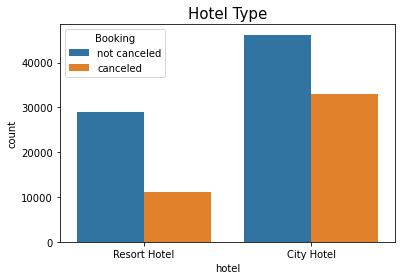

In [113]:
table = pd.crosstab(df["is_canceled"], df["hotel"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="hotel", hue="is_canceled", data=df)
plt.title('Hotel Type', fontsize = 15)
plt.legend(title='Booking', loc='upper left', labels=['not canceled', 'canceled'])


chi-sqr stat:  304.23617668200444 p-value: 1.3212351959124216e-64


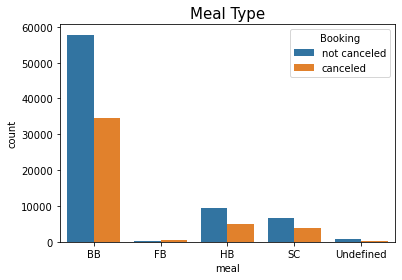

In [114]:
table = pd.crosstab(df["is_canceled"], df["meal"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="meal", hue="is_canceled", data=df)
plt.title('Meal Type', fontsize = 15)
plt.legend(title='Booking', loc='upper right', labels=['not canceled', 'canceled'])

chi-sqr stat:  8497.224089832987 p-value: 0.0


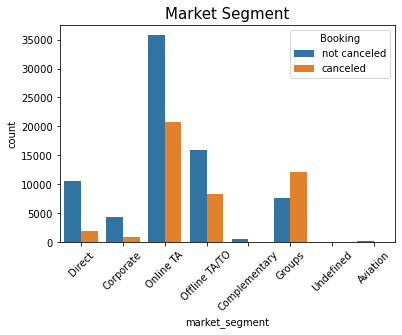

In [115]:
table = pd.crosstab(df["is_canceled"], df["market_segment"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="market_segment", hue="is_canceled", data=df)
plt.xticks(rotation=45)
plt.title('Market Segment', fontsize = 15)
plt.legend(title='Booking', loc='upper right', labels=['not canceled', 'canceled'])

chi-sqr stat:  3745.794123751679 p-value: 0.0


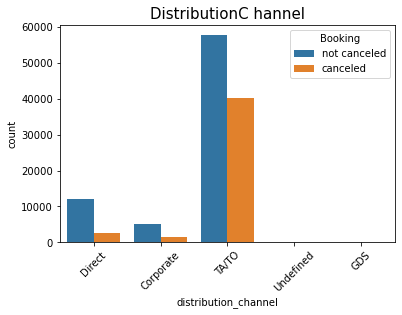

In [116]:
table = pd.crosstab(df["is_canceled"], df["distribution_channel"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="distribution_channel", hue="is_canceled", data=df)
plt.xticks(rotation=45)
plt.title('DistributionC hannel', fontsize = 15)
plt.legend(title='Booking', loc='upper right', labels=['not canceled', 'canceled'])

chi-sqr stat:  647.8350973363271 p-value: 1.121956218424043e-133


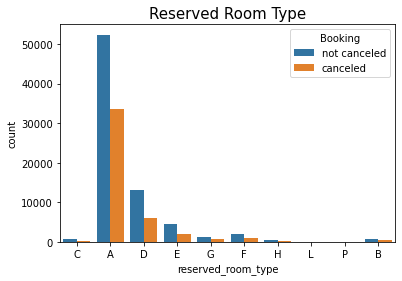

In [117]:
table = pd.crosstab(df["is_canceled"], df["reserved_room_type"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="reserved_room_type", hue="is_canceled", data=df)
plt.title('Reserved Room Type', fontsize = 15)
plt.legend(title='Booking', loc='upper right', labels=['not canceled', 'canceled'])

chi-sqr stat:  4918.693385408558 p-value: 0.0


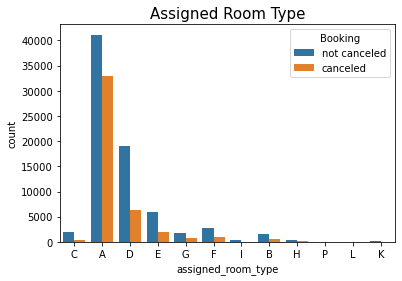

In [118]:
table = pd.crosstab(df["is_canceled"], df["assigned_room_type"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="assigned_room_type", hue="is_canceled", data=df)
plt.title('Assigned Room Type', fontsize = 15)
plt.legend(title='Booking', loc='upper right', labels=['not canceled', 'canceled'])

chi-sqr stat:  27677.32924132434 p-value: 0.0


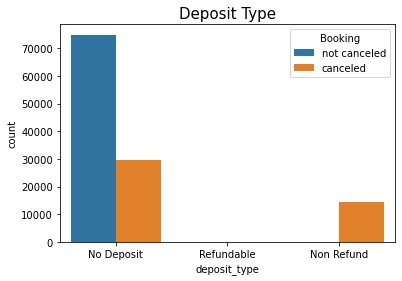

In [119]:
table = pd.crosstab(df["is_canceled"], df["deposit_type"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="deposit_type", hue="is_canceled", data=df)
plt.title('Deposit Type', fontsize = 15)
plt.legend(title='Booking', loc='upper right', labels=['not canceled', 'canceled'])

chi-sqr stat:  2222.50416048372 p-value: 0.0


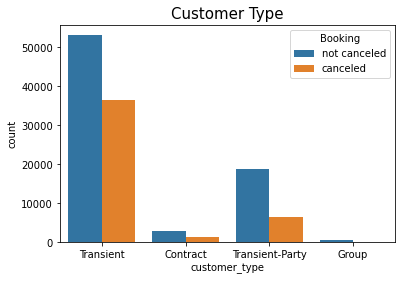

In [120]:
table = pd.crosstab(df["is_canceled"], df["customer_type"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="customer_type", hue="is_canceled", data=df)
plt.title('Customer Type', fontsize = 15)
plt.legend(title='Booking', loc='upper right', labels=['not canceled', 'canceled'])

##### Normalized Data

chi-sqr stat:  915.2446645999767 p-value: 4.762604547189337e-201


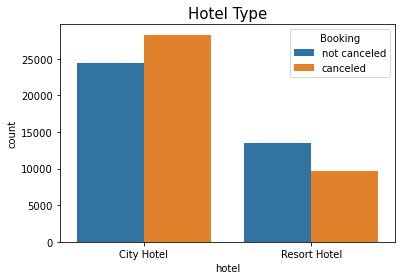

In [121]:
table = pd.crosstab(normalized_df["is_canceled"], normalized_df["hotel"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="hotel", hue="is_canceled", data=normalized_df)
plt.title('Hotel Type', fontsize = 15)
plt.legend(title='Booking', loc='upper right', labels=['not canceled', 'canceled'])

chi-sqr stat:  200.28338618104692 p-value: 3.265468522188319e-42


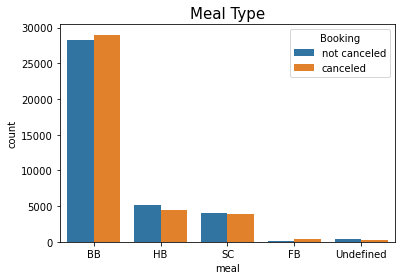

In [122]:
table = pd.crosstab(normalized_df["is_canceled"], normalized_df["meal"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="meal", hue="is_canceled", data=normalized_df)
plt.title('Meal Type', fontsize = 15)
plt.legend(title='Booking', loc='upper right', labels=['not canceled', 'canceled'])

chi-sqr stat:  4801.1046871169165 p-value: 0.0


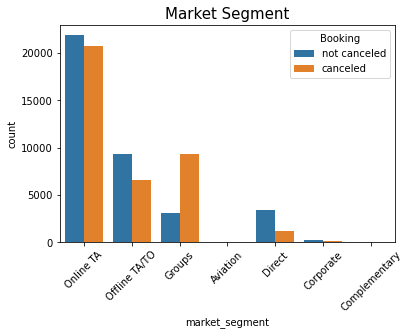

In [123]:
table = pd.crosstab(normalized_df["is_canceled"], normalized_df["market_segment"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="market_segment", hue="is_canceled", data=normalized_df)
plt.xticks(rotation=45)
plt.title('Market Segment', fontsize = 15)
plt.legend(title='Booking', loc='upper right', labels=['not canceled', 'canceled'])

chi-sqr stat:  1035.8854842740357 p-value: 2.9535187165854143e-224


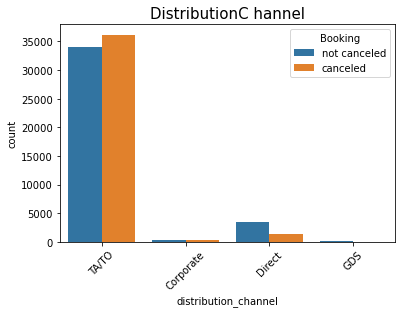

In [124]:
table = pd.crosstab(normalized_df["is_canceled"], normalized_df["distribution_channel"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="distribution_channel", hue="is_canceled", data=normalized_df)
plt.xticks(rotation=45)
plt.title('DistributionC hannel', fontsize = 15)
plt.legend(title='Booking', loc='upper right', labels=['not canceled', 'canceled'])

chi-sqr stat:  395.7871320325842 p-value: 1.9094686004795772e-81


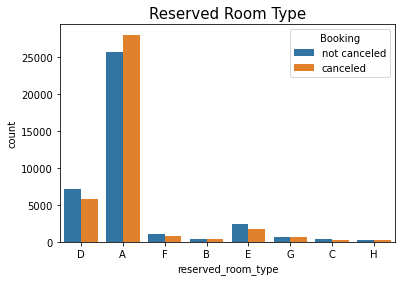

In [125]:
table = pd.crosstab(normalized_df["is_canceled"], normalized_df["reserved_room_type"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="reserved_room_type", hue="is_canceled", data=normalized_df)
plt.title('Reserved Room Type', fontsize = 15)
plt.legend(title='Booking', loc='upper right', labels=['not canceled', 'canceled'])

chi-sqr stat:  2780.9331413322125 p-value: 0.0


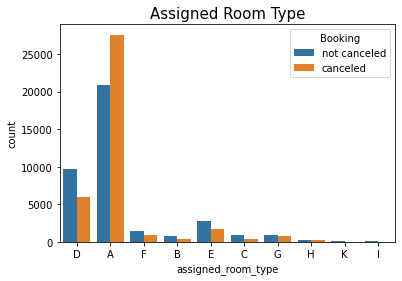

In [126]:
table = pd.crosstab(normalized_df["is_canceled"], normalized_df["assigned_room_type"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="assigned_room_type", hue="is_canceled", data=normalized_df)
plt.title('Assigned Room Type', fontsize = 15)
plt.legend(title='Booking', loc='upper right', labels=['not canceled', 'canceled'])

chi-sqr stat:  12207.633695751429 p-value: 0.0


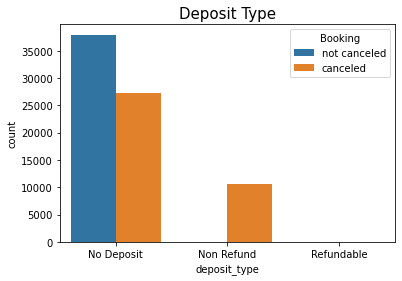

In [127]:
table = pd.crosstab(normalized_df["is_canceled"], normalized_df["deposit_type"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="deposit_type", hue="is_canceled", data=normalized_df)
plt.title('Deposit Type', fontsize = 15)
plt.legend(title='Booking', loc='upper right', labels=['not canceled', 'canceled'])

chi-sqr stat:  1388.1789849697875 p-value: 1.0820286884230539e-300


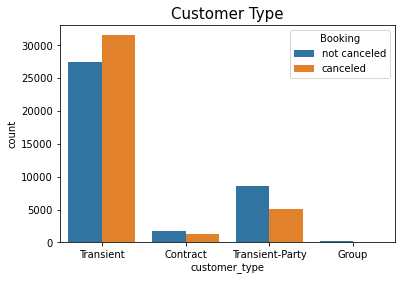

In [128]:
table = pd.crosstab(normalized_df["is_canceled"], normalized_df["customer_type"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="customer_type", hue="is_canceled", data=normalized_df)
plt.title('Customer Type', fontsize = 15)
plt.legend(title='Booking', loc='upper right', labels=['not canceled', 'canceled'])

##### Exclude meal & reserved_room_type based on the cramer's V and chisquared test and create dummy variables for the rest categorical variables

In [129]:
df_dummy = df.drop(["reserved_room_type", 'meal'], axis = 1)

In [130]:
# Dummy for cat
df_dummy1 = pd.get_dummies(df_dummy, columns = ['customer_type', 'deposit_type','assigned_room_type', 'distribution_channel',
                                               'market_segment', 'hotel'])


normalized_df1 = pd.get_dummies(normalized_df, columns = ['customer_type', 'deposit_type','assigned_room_type', 'distribution_channel',
                                               'market_segment', 'hotel'])

In [131]:
# Dummy for numerical
normalized_df1['lead_time_less'] = normalized_df1['lead_time'].apply(lambda x: 1 if x <= 90 else 0)
normalized_df1['lead_time_over'] = normalized_df1['lead_time'].apply(lambda x: 1 if x > 90 else 0)

normalized_df1['total_of_special_requests_0'] = normalized_df1['total_of_special_requests'].apply(lambda x: 1 if x == 0 else 0)
normalized_df1['total_of_special_requests_over'] = normalized_df1['total_of_special_requests'].apply(lambda x: 1 if x < 0 else 0)

normalized_df1['required_car_parking_spaces_0'] = normalized_df1['required_car_parking_spaces'].apply(lambda x: 1 if x == 0 else 0)
normalized_df1['required_car_parking_spaces_over'] = normalized_df1['required_car_parking_spaces'].apply(lambda x: 1 if x > 0 else 0)

normalized_df1['booking_changes_0'] = normalized_df1['booking_changes'].apply(lambda x: 1 if x == 0 else 0)
normalized_df1['booking_changes_over'] = normalized_df1['booking_changes'].apply(lambda x: 1 if x > 0 else 0)

normalized_df1['previous_cancellations_0'] = normalized_df1['previous_cancellations'].apply(lambda x: 1 if x == 0 else 0)
normalized_df1['previous_cancellations_over'] = normalized_df1['previous_cancellations'].apply(lambda x: 1 if x > 0 else 0)

normalized_df1['total_of_special_requests_0'] = normalized_df1['total_of_special_requests'].apply(lambda x: 1 if x == 0 else 0)
normalized_df1['total_of_special_requests_over'] = normalized_df1['total_of_special_requests'].apply(lambda x: 1 if x > 0 else 0)


In [132]:
# Dummy for numerical
df_dummy1['lead_time_less'] = df_dummy1['lead_time'].apply(lambda x: 1 if x <= 90 else 0)
df_dummy1['lead_time_over'] = df_dummy1['lead_time'].apply(lambda x: 1 if x > 90 else 0)

df_dummy1['total_of_special_requests_0'] = df_dummy1['total_of_special_requests'].apply(lambda x: 1 if x == 0 else 0)
df_dummy1['total_of_special_requests_over'] = df_dummy1['total_of_special_requests'].apply(lambda x: 1 if x < 0 else 0)

df_dummy1['required_car_parking_spaces_0'] = df_dummy1['required_car_parking_spaces'].apply(lambda x: 1 if x == 0 else 0)
df_dummy1['required_car_parking_spaces_over'] = df_dummy1['required_car_parking_spaces'].apply(lambda x: 1 if x > 0 else 0)

df_dummy1['booking_changes_0'] = df_dummy1['booking_changes'].apply(lambda x: 1 if x == 0 else 0)
df_dummy1['booking_changes_over'] = df_dummy1['booking_changes'].apply(lambda x: 1 if x > 0 else 0)

df_dummy1['previous_cancellations_0'] = df_dummy1['previous_cancellations'].apply(lambda x: 1 if x == 0 else 0)
df_dummy1['previous_cancellations_over'] = df_dummy1['previous_cancellations'].apply(lambda x: 1 if x > 0 else 0)

df_dummy1['total_of_special_requests_0'] = df_dummy1['total_of_special_requests'].apply(lambda x: 1 if x == 0 else 0)
df_dummy1['total_of_special_requests_over'] = df_dummy1['total_of_special_requests'].apply(lambda x: 1 if x > 0 else 0)

In [133]:
df_dummy.shape

(119390, 30)

lead_time                         0.277666
total_of_special_requests         0.257934
required_car_parking_spaces       0.188298
booking_changes                   0.131714
previous_cancellations            0.117983
agent                             0.081939
days_in_waiting_list              0.052475
previous_bookings_not_canceled    0.042589
adults                            0.037057
babies                            0.032038
is_repeated_guest                 0.029913
stays_in_weekend_nights           0.023589
adr                               0.023284
arrival_date_day_of_month         0.005468
children                          0.005409
arrival_date_year                 0.004561
arrival_date_week_number          0.004172
stays_in_week_nights              0.003918

In [134]:
dcorr = df.corr()["is_canceled"]

corr.abs().sort_values(ascending=False)[1:]


lead_time                         0.270282
total_of_special_requests         0.261302
required_car_parking_spaces       0.214746
booking_changes                   0.137866
previous_cancellations            0.102375
agent                             0.076177
previous_bookings_not_canceled    0.059289
adults                            0.046547
babies                            0.036014
is_repeated_guest                 0.028653
days_in_waiting_list              0.025588
adr                               0.025222
arrival_date_week_number          0.019246
stays_in_weekend_nights           0.017874
stays_in_week_nights              0.009979
children                          0.008950
arrival_date_day_of_month         0.004052
arrival_date_year                 0.001626
Name: is_canceled, dtype: float64

## Predict cancelations 

In [135]:
# Create a function for evaluation metrics
def print_result(cm, y_test, y_pred):
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)

    print ('Accuracy:', accuracy_score(y_test, y_pred))
    print ('F1 score:', f1_score(y_test, y_pred))
    print ('Recall(Specificity):', recall_score(y_test, y_pred))
    print('Sensitivity : ', sensitivity )
    print ('Precision:', precision_score(y_test, y_pred))
    print('RMSE:', math.sqrt(mse))
    print ('AUC:', roc_auc_score(y_test, y_pred))
    
# Create a function for roc plotting
def plot_roc(y_test, y_pred, title):
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)

    plt.subplots(1, figsize=(4,4))
    plt.title(title, fontsize = 15)
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate', fontsize = 10)
    plt.xlabel('False Positive Rate', fontsize = 10)
    plt.show()
    print ('AUC:', roc_auc_score(y_test, y_pred))

### Data Preparation

In [136]:
df_dummy1['lead_time_less'] = df_dummy1['lead_time'].apply(lambda x: 1 if x <= 90 else 0)
df_dummy1['lead_time_over'] = df_dummy1['lead_time'].apply(lambda x: 1 if x > 90 else 0)

df_dummy1['total_of_special_requests_0'] = df_dummy1['total_of_special_requests'].apply(lambda x: 1 if x == 0 else 0)
df_dummy1['total_of_special_requests_over'] = df_dummy1['total_of_special_requests'].apply(lambda x: 1 if x < 0 else 0)

df_dummy1['required_car_parking_spaces_0'] = df_dummy1['required_car_parking_spaces'].apply(lambda x: 1 if x == 0 else 0)
df_dummy1['required_car_parking_spaces_over'] = df_dummy1['required_car_parking_spaces'].apply(lambda x: 1 if x > 0 else 0)

df_dummy1['booking_changes_0'] = df_dummy1['booking_changes'].apply(lambda x: 1 if x == 0 else 0)
df_dummy1['booking_changes_over'] = df_dummy1['booking_changes'].apply(lambda x: 1 if x > 0 else 0)

df_dummy1['previous_cancellations_0'] = df_dummy1['previous_cancellations'].apply(lambda x: 1 if x == 0 else 0)
df_dummy1['previous_cancellations_over'] = df_dummy1['previous_cancellations'].apply(lambda x: 1 if x > 0 else 0)

df_dummy1['total_of_special_requests_0'] = df_dummy1['total_of_special_requests'].apply(lambda x: 1 if x == 0 else 0)
df_dummy1['total_of_special_requests_over'] = df_dummy1['total_of_special_requests'].apply(lambda x: 1 if x > 0 else 0)


In [137]:
df_dummy1.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'deposit_type_No Deposit',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'assigned_room_type_A', 'assigned_room_type_B', 'assigned_room_type_C',
       'assigned_room_type_D', 'assigned_room_type_E', 'assigned_room_type_F',
       'assigned_room_type_G', 'assigned_room_type_H', 'assigned_room_type_I',
       'assign

### Logistic Regression model

In [187]:

X = df_dummy1[['hotel_City Hotel', 'deposit_type_Non Refund', 'customer_type_Transient','assigned_room_type_A', 
              'total_of_special_requests','previous_cancellations', 'market_segment_Groups', 'distribution_channel_TA/TO',
               'lead_time']]
y = df_dummy1[['is_canceled']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=109)

logit_model = sm.Logit(y_train,X_train).fit()

print(logit_model.summary())
print("AIC: ", logit_model.aic)
print("BIC: ", logit_model.bic)

y_pred= logit_model.predict(X_test)

y_pred= logit_model.predict(X_train)



Optimization terminated successfully.
         Current function value: 0.526718
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                83573
Model:                          Logit   Df Residuals:                    83564
Method:                           MLE   Df Model:                            8
Date:                Sat, 10 Oct 2020   Pseudo R-squ.:                  0.2016
Time:                        01:43:06   Log-Likelihood:                -44019.
converged:                       True   LL-Null:                       -55133.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
hotel_City Hotel              -0.2303      0.017    -13.472      0.000      

In [188]:
np.exp(logit_model.params)

hotel_City Hotel                0.794257
deposit_type_Non Refund       333.430609
customer_type_Transient         0.740041
assigned_room_type_A            0.863994
total_of_special_requests       0.531716
previous_cancellations          3.036859
market_segment_Groups           0.374799
distribution_channel_TA/TO      0.955573
lead_time                       1.001895
dtype: float64

In [189]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\klee1\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\klee1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [190]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[21764,   869],
       [ 7291,  5893]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

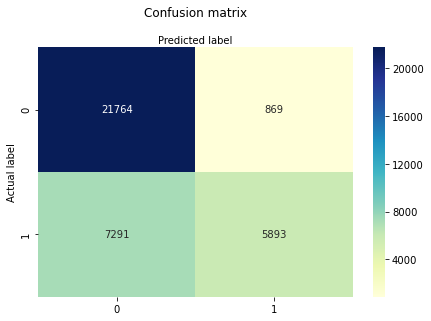

In [191]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [192]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.772175224055616
Precision: 0.8714877255249927
Recall: 0.44698118932038833


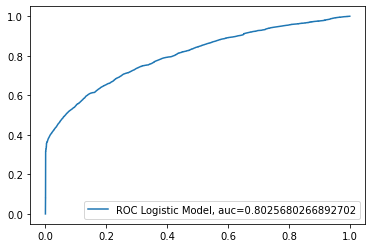

In [193]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC Logistic Model, auc="+str(auc))
plt.legend(loc=4)
plt.show()

C:\Users\klee1\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Feature: 0, Score: 0.10946
Feature: 1, Score: 4.50235
Feature: 2, Score: 1.19787
Feature: 3, Score: 0.31689
Feature: 4, Score: -0.55823
Feature: 5, Score: 1.27783
Feature: 6, Score: 0.17426
Feature: 7, Score: 1.01814
Feature: 8, Score: 0.00403


C:\Users\klee1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


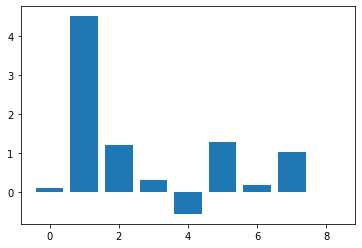

In [194]:
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Random Forest

In [195]:
# Build a random forest classification model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.3,random_state=1234, stratify=y)
rfcm = RandomForestClassifier()
rfcm.fit(X_train, y_train)
y_pred = rfcm.predict(X_test)

# Build a confusion matrix and show the Classification Report
cm = metrics.confusion_matrix(y_test,y_pred)
print('\nConfusion Matrix','\n',cm)
print('\nClassification Report','\n',metrics.classification_report(y_test,y_pred))

C:\Users\klee1\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.



Confusion Matrix 
 [[19931  2619]
 [ 5037  8230]]

Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84     22550
           1       0.76      0.62      0.68     13267

    accuracy                           0.79     35817
   macro avg       0.78      0.75      0.76     35817
weighted avg       0.78      0.79      0.78     35817



Text(0.5, 257.44, 'Predicted label')

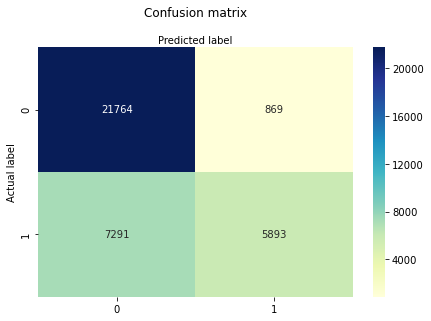

In [196]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [197]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7862467543345338
Precision: 0.7585952622361508
Recall: 0.6203361724579785


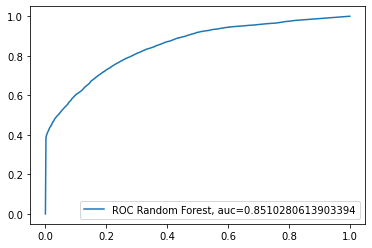

In [198]:
y_pred_proba = rfcm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC Random Forest, auc="+str(auc))
plt.legend(loc=4)
plt.show()

C:\Users\klee1\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Feature: 0, Score: 0.01250
Feature: 1, Score: 0.31814
Feature: 2, Score: 0.06010
Feature: 3, Score: 0.01885
Feature: 4, Score: 0.07735
Feature: 5, Score: 0.08368
Feature: 6, Score: 0.01736
Feature: 7, Score: 0.02958
Feature: 8, Score: 0.38243


<function matplotlib.pyplot.show(close=None, block=None)>

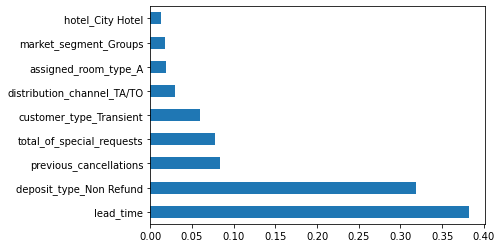

In [199]:
model = RandomForestClassifier()
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show

### Decision Tree

In [200]:
# Create a model (object) for classification
dtm = DecisionTreeClassifier()
# Build a decision tree
dtm.fit(X_train, y_train)
y_pred = dtm.predict(X_test)

# Build a confusion matrix and show the Classification Report
cm = metrics.confusion_matrix(y_test,y_pred)
print('\nConfusion Matrix','\n',cm)
print('\nClassification Report','\n',metrics.classification_report(y_test,y_pred))


Confusion Matrix 
 [[20269  2281]
 [ 5279  7988]]

Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84     22550
           1       0.78      0.60      0.68     13267

    accuracy                           0.79     35817
   macro avg       0.79      0.75      0.76     35817
weighted avg       0.79      0.79      0.78     35817



Text(0.5, 257.44, 'Predicted label')

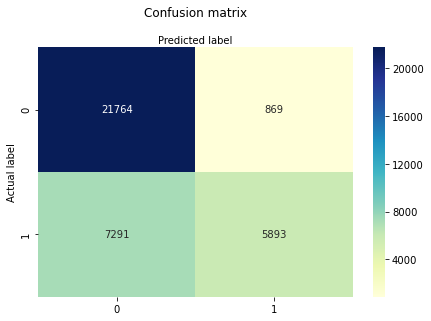

In [201]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [202]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7889270458162325
Precision: 0.7778751582432564
Recall: 0.6020954247380719


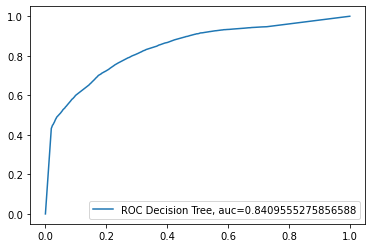

In [203]:
y_pred_proba = dtm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC Decision Tree, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Feature: 0, Score: 0.02476
Feature: 1, Score: 0.46034
Feature: 2, Score: 0.04354
Feature: 3, Score: 0.02009
Feature: 4, Score: 0.06764
Feature: 5, Score: 0.06501
Feature: 6, Score: 0.01216
Feature: 7, Score: 0.03451
Feature: 8, Score: 0.27196
[0.024755   0.4603356  0.04353701 0.02009412 0.06764423 0.06500949
 0.01215659 0.03451115 0.27195681]


<function matplotlib.pyplot.show(close=None, block=None)>

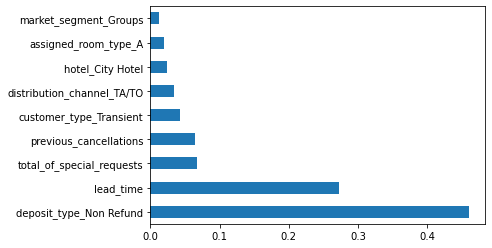

In [204]:

model = DecisionTreeClassifier()
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show

### Logistic Regression (Normalized Data)

In [205]:
X = normalized_df1[['hotel_City Hotel', 'deposit_type_Non Refund', 'customer_type_Transient','assigned_room_type_A', 
              'total_of_special_requests','previous_cancellations', 'market_segment_Groups', 'distribution_channel_TA/TO',
               'lead_time']]
y = normalized_df1[['is_canceled']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=109)

logit_model = sm.Logit(y_train,X_train).fit()

print(logit_model.summary())
print("AIC: ", logit_model.aic)
print("BIC: ", logit_model.bic)

y_pred= logit_model.predict(X_test)

y_pred= logit_model.predict(X_train)



Optimization terminated successfully.
         Current function value: 0.550479
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                53154
Model:                          Logit   Df Residuals:                    53145
Method:                           MLE   Df Model:                            8
Date:                Sat, 10 Oct 2020   Pseudo R-squ.:                  0.2058
Time:                        01:43:46   Log-Likelihood:                -29260.
converged:                       True   LL-Null:                       -36843.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
hotel_City Hotel              -0.1300      0.021     -6.195      0.000     

In [206]:
np.exp(logit_model.params)

hotel_City Hotel                0.878134
deposit_type_Non Refund       194.506142
customer_type_Transient         1.604941
assigned_room_type_A            1.076115
total_of_special_requests       0.554590
previous_cancellations         19.484415
market_segment_Groups           0.629913
distribution_channel_TA/TO      0.624927
lead_time                       1.002255
dtype: float64

In [207]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\klee1\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\klee1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [208]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[9045, 2307],
       [4156, 7273]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

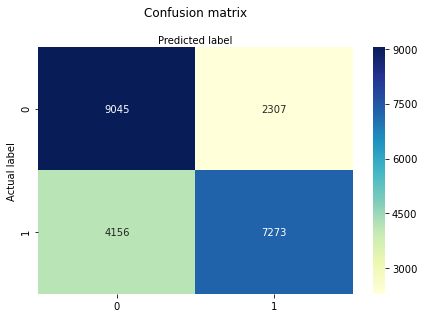

In [209]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [210]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7162986699442518
Precision: 0.7591858037578288
Recall: 0.6363636363636364


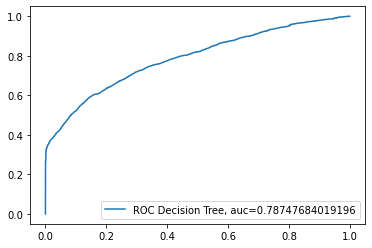

In [211]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC Decision Tree, auc="+str(auc))
plt.legend(loc=4)
plt.show()

C:\Users\klee1\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Feature: 0, Score: 0.14090
Feature: 1, Score: 4.09364
Feature: 2, Score: 1.39406
Feature: 3, Score: 0.28856
Feature: 4, Score: -0.55306
Feature: 5, Score: 2.82005
Feature: 6, Score: 0.22133
Feature: 7, Score: 0.84169
Feature: 8, Score: 0.00388


C:\Users\klee1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


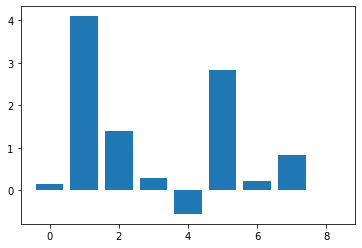

In [212]:
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Random Forest (Normalized Data)

In [213]:
# Build a random forest classification model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.3,random_state=1234, stratify=y)
rfcm = RandomForestClassifier()
rfcm.fit(X_train, y_train)
y_pred = rfcm.predict(X_test)

# Build a confusion matrix and show the Classification Report
cm = metrics.confusion_matrix(y_test,y_pred)
print('\nConfusion Matrix','\n',cm)
print('\nClassification Report','\n',metrics.classification_report(y_test,y_pred))

C:\Users\klee1\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.



Confusion Matrix 
 [[8411 2980]
 [3033 8357]]

Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.74      0.74     11391
           1       0.74      0.73      0.74     11390

    accuracy                           0.74     22781
   macro avg       0.74      0.74      0.74     22781
weighted avg       0.74      0.74      0.74     22781



Text(0.5, 257.44, 'Predicted label')

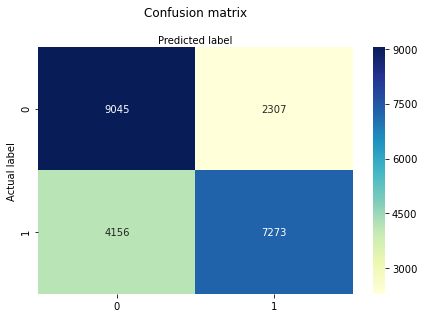

In [214]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [215]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7360519731355076
Precision: 0.7371438652200759
Recall: 0.7337137840210711


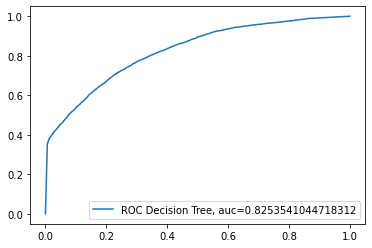

In [216]:
y_pred_proba = rfcm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC Decision Tree, auc="+str(auc))
plt.legend(loc=4)
plt.show()

C:\Users\klee1\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Feature: 0, Score: 0.01374
Feature: 1, Score: 0.20265
Feature: 2, Score: 0.07138
Feature: 3, Score: 0.02137
Feature: 4, Score: 0.10771
Feature: 5, Score: 0.08229
Feature: 6, Score: 0.01961
Feature: 7, Score: 0.01949
Feature: 8, Score: 0.46175


<function matplotlib.pyplot.show(close=None, block=None)>

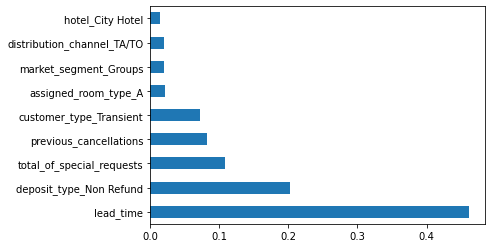

In [217]:
model = RandomForestClassifier()
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show

### Decision Tree (Normalized Data)

In [218]:
# Create a model (object) for classification
dtm = DecisionTreeClassifier()
# Build a decision tree
dtm.fit(X_train, y_train)
y_pred = dtm.predict(X_test)

# Build a confusion matrix and show the Classification Report
cm = metrics.confusion_matrix(y_test,y_pred)
print('\nConfusion Matrix','\n',cm)
print('\nClassification Report','\n',metrics.classification_report(y_test,y_pred))


Confusion Matrix 
 [[8742 2649]
 [3330 8060]]

Classification Report 
               precision    recall  f1-score   support

           0       0.72      0.77      0.75     11391
           1       0.75      0.71      0.73     11390

    accuracy                           0.74     22781
   macro avg       0.74      0.74      0.74     22781
weighted avg       0.74      0.74      0.74     22781



Text(0.5, 257.44, 'Predicted label')

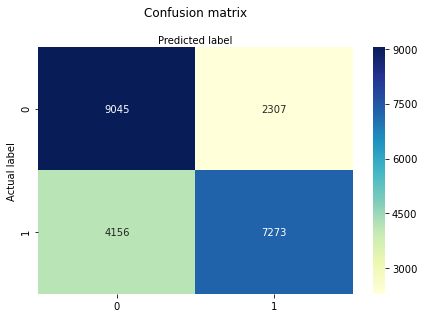

In [219]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [220]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7375444449321803
Precision: 0.752637968064245
Recall: 0.707638279192274


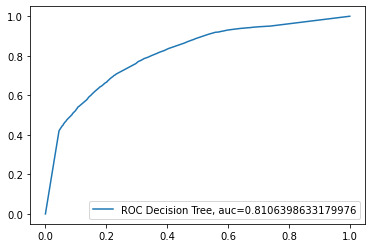

In [221]:
y_pred_proba = dtm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC Decision Tree, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Feature: 0, Score: 0.02974
Feature: 1, Score: 0.33685
Feature: 2, Score: 0.06295
Feature: 3, Score: 0.02609
Feature: 4, Score: 0.09305
Feature: 5, Score: 0.06812
Feature: 6, Score: 0.00950
Feature: 7, Score: 0.02500
Feature: 8, Score: 0.34869
[0.02974478 0.3368492  0.06295256 0.02608875 0.09304994 0.06812114
 0.00950388 0.0249981  0.34869165]


<function matplotlib.pyplot.show(close=None, block=None)>

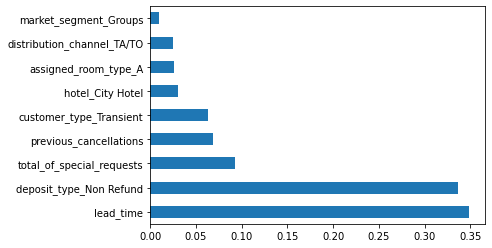

In [222]:
model = DecisionTreeClassifier()
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show

### KNN Neighbourhood (Normalized Data)

In [223]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [224]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\klee1\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


[[8462 2929]
 [3446 7944]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.73     11391
           1       0.73      0.70      0.71     11390

    accuracy                           0.72     22781
   macro avg       0.72      0.72      0.72     22781
weighted avg       0.72      0.72      0.72     22781



Text(0.5, 257.44, 'Predicted label')

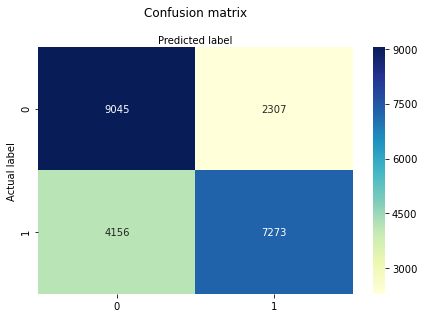

In [225]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [226]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7201615381238752
Precision: 0.7306171249885036
Recall: 0.6974539069359087


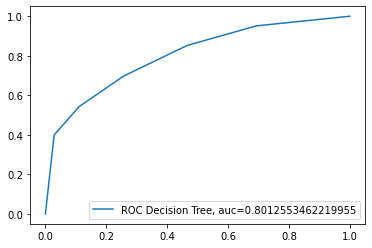

In [227]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC Decision Tree, auc="+str(auc))
plt.legend(loc=4)
plt.show()